# INFO 204 Lab 3 - Data Wrangling

For this lab, we will be working further with pandas data frames, and general data reshaping, cleaning, and such ("data wrangling").

For code examples revise Lecture 3 and take a look at the the Python [pandas library](https://pandas.pydata.org/) documentation as you will primarily be using functions from this Python package.

## Part 1 - Data Loading and Aggregation for Simple Descriptive Statistics

In this step, you will work with importing CSV files using pandas, and then work with some basic aggregation. We will link the work done in the last tutorial and the end of the previous lab ("Tim's Breakfast") and ensure that you know how to use pandas and numpy together to compute various useful statistics.

Some of the examples from Lecture 3 will be very useful in this step!

Let's start by importing the required libraries for this step:

In [3]:
import pandas as pd
import numpy as np

Then, let's load in our first set of data:

In [5]:
simple_stats = pd.read_csv('simple_stats.csv')

simple_stats

,i,Group,X
0,1,A,2
1,2,A,7
2,3,A,4
3,4,A,9
4,5,B,6
5,6,B,7
6,7,B,10
7,8,B,9


The data is the same data from the tutorial. Let's compute the same statistics as in the tutorial - we can do this with pandas' [agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) function:

In [6]:
simple_stats.agg({'X' : [ np.mean, np.median, np.std ] })

,X
mean,6.750000
median,7.000000
std,2.712405


Alternatively, we could extract the statistics directly from the columns themselves

In [7]:
mean = simple_stats['X'].mean()
med  = simple_stats['X'].median()
std  = simple_stats['X'].std()

print(f"The mean of X is {mean}, while its median is {med} and it has a standard deviation of {std}")

The mean of X is 6.75, while its median is 7.0 and it has a standard deviation of 2.712405363721075


Grouped statistics (e.g., conditional means) can be easily extracted by using pandas' [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function:

In [8]:
simple_stats.groupby('Group').agg({'X' : [ np.mean, np.median, np.std ] })

X                 
      mean median       std
Group                      
A      5.5    5.5  3.109126
B      8.0    8.0  1.825742

Notice that the result when grouped is a data frame with one row per group and the required stats as columns. This is in contrast to when agg() was called without first grouping, which produces a row for each required statistic. If consistency is required, we can transpose the ungrouped result by using pandas' [transpose()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html) functionality.

**TASK 1:** transpose the "ungrouped" aggregation results from the earlier step so that each required statistic appears in its own column:

In [12]:
### YOUR CODE HERE
np.transpose(simple_stats.groupby('Group').agg({'X' : [ np.mean, np.median, np.std ] }))

Group            A         B
X mean    5.500000  8.000000
  median  5.500000  8.000000
  std     3.109126  1.825742

## Part 2 - Estimating Probabilities from Sample Data Using Pandas

In this step, we will be using pandas and numpy to recreate the steps you performed in the last tutorial.

**TASK 2:** first load in the data from the previous tutorial (found in the file tims_breakfast.csv) into a data frame named tims_breakfast:

In [19]:
### YOUR CODE HERE
tims_breakfast = pd.read_csv('tims_breakfast.csv')
tims_breakfast

,Day,Weather,Breakfast
0,1,Fine,Eggs
1,2,Fine,Muesli
2,3,Rain,Eggs
3,4,Fine,Eggs
4,5,Rain,Muesli
5,6,Rain,Muesli
6,7,Fine,Eggs
7,8,Fine,Eggs
8,9,Fine,Muesli
9,10,Rain,Eggs


Recall that probabilities can be _estimated_ from sample data through computing the proportions of relevant events (observations) in our data. For example, to estimate the probability of Fine weather $P(Fine)$, we can start by identifying the observations (rows) in our data that present Fine weather:

In [20]:
tims_breakfast['Weather'] == 'Fine'

0     True
1     True
2    False
3     True
4    False
5    False
6     True
7     True
8     True
9    False
Name: Weather, dtype: bool

And from there, just compute the mean of this result (remembering that True is coerced into 1 and False to 0 when they are treated as a number):

In [21]:
np.mean(tims_breakfast['Weather'] == 'Fine')

0.6

Joint probabilities can be computed in a similar way, only now multiple columns have to be tested (and the results of each test joined together through a logical 'and'):

For example, to estimate the joint probability $P(Fine, Eggs)$, we perform the following:

In [22]:
np.mean(np.all([tims_breakfast['Weather'] == 'Fine', tims_breakfast['Breakfast'] == 'Eggs'], axis=0))

0.4

**TASK 3:** Estimate the joint probability $P(Rain,Eggs)$

In [50]:

### YOUR CODE HERE

np.mean(np.all([tims_breakfast['Weather'] == 'Rain', tims_breakfast['Breakfast'] == 'Eggs'], axis=0))

0.2

Finally, conditional probabilities can be estimated through a combination of filtering on the conditional event, and then measuring the probability of the event of interest. For example, to estimate $P(Eggs|Fine)$:

In [51]:
np.mean(tims_breakfast[tims_breakfast['Weather'] == 'Fine']['Breakfast'] == 'Eggs')

0.6666666666666666

**TASK 4:** Estimate the conditional probability $P(Rain|Eggs)$:

In [77]:
### YOUR CODE HERE
np.mean(tims_breakfast[tims_breakfast['Weather'] == 'Rain']['Breakfast'] == 'Eggs')

0.5

## Part 3 - More Pandas Manipulation

First we will upload the transactions.csv data set.The data set contains 5000 transactions provided by one of your clients, an e-Commerce website business.

In [521]:
transactions = pd.read_csv('transactions.csv')
transactions

,Transaction,Date,Price,Product ID,Quantity Purchased,Serial No,User ID,User Type
0,0,NaN,3191.12,0,19,1000,-101,n
1,1,NaN,1405.48,3490,23,1001,8674,n
2,2,NaN,NaN,3503,3,1002,9619,n
3,3,NaN,1195.60,4372,4,1003,8513,n
4,4,2016-01-02,834.56,782,23,1004,9643,n
...,...,...,...,...,...,...,...,...
4995,4995,2016-02-02,1259.32,5028,28,5995,6222,b
4996,4996,2016-04-01,521.45,3466,23,5996,8790,d
4997,4997,2016-01-30,690.08,4533,5,5997,7566,a
4998,4998,2016-01-25,1874.09,1745,36,5998,8720,c


### Renaming Columns

Often, data is imported from a range of sources where the names and data types are not really Python-friendly. For example, the transaction data is presented with column names with spaces and mixed case - the "Python way" is to use lower case names with spaces replaced with underscores (the so-called [snake case](https://en.wikipedia.org/wiki/Snake_case)). Let's start by extracting the column names from our transactions data frame:

In [522]:
current_column_names = transactions.columns.values
print(current_column_names)

['Transaction' 'Date' 'Price' 'Product ID' 'Quantity Purchased'
 'Serial No' 'User ID' 'User Type']


**TASK 5:** Convert the current columns names to lower case and return the result as a list. Use the builtin [lower()](https://docs.python.org/3/library/stdtypes.html#str.lower) method to do this, and use list comprehension!

In [523]:
### YOUR CODE HERE
current_column_names
my_list = []
for x in current_column_names:
    my_list.append(x.lower())
print(my_list)

['transaction', 'date', 'price', 'product id', 'quantity purchased', 'serial no', 'user id', 'user type']


**TASK 6:** Replace any spaces with underscores in the lowercase names from the previous step:

In [524]:
### YOUR CODE HERE  
new_list = []
for j in my_list:
      new_list.append(j.replace(" ", "_"))
      
print(new_list)

['transaction', 'date', 'price', 'product_id', 'quantity_purchased', 'serial_no', 'user_id', 'user_type']


To rename the columns in the transactions data frame, we need a  Python [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) that maps the old name to a new cleaned up snake case name. We can do this through dict comprehension that essentially combines the steps of Tasks 5 and 6 and stores them in a dictionary under the key of the old column name:

In [525]:
new_column_names = { col: col.lower().replace(' ', '_') for col in current_column_names }
print(new_column_names)

{'Transaction': 'transaction', 'Date': 'date', 'Price': 'price', 'Product ID': 'product_id', 'Quantity Purchased': 'quantity_purchased', 'Serial No': 'serial_no', 'User ID': 'user_id', 'User Type': 'user_type'}


Finally, we can use pandas' [rename()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) functionality to rename the columns as desired:

In [526]:
transactions.rename(columns=new_column_names, inplace=True)
transactions

,transaction,date,price,product_id,quantity_purchased,serial_no,user_id,user_type
0,0,NaN,3191.12,0,19,1000,-101,n
1,1,NaN,1405.48,3490,23,1001,8674,n
2,2,NaN,NaN,3503,3,1002,9619,n
3,3,NaN,1195.60,4372,4,1003,8513,n
4,4,2016-01-02,834.56,782,23,1004,9643,n
...,...,...,...,...,...,...,...,...
4995,4995,2016-02-02,1259.32,5028,28,5995,6222,b
4996,4996,2016-04-01,521.45,3466,23,5996,8790,d
4997,4997,2016-01-30,690.08,4533,5,5997,7566,a
4998,4998,2016-01-25,1874.09,1745,36,5998,8720,c


That's it, our column names look MUCH nicer (from a Python perspective, at least :)).

**TASK 7:** Now that the column names are cleaned up, use the [descibe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function to extract some basic descriptive statistics from the data frame:

In [527]:
### YOUR CODE HERE\
transactions.describe()

,transaction,price,product_id,quantity_purchased,serial_no,user_id
count,5000.000000,4930.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,2295.630012,2558.788600,20.762800,3449.496800,7403.354400
std,1443.520003,1612.857303,1429.168594,11.967605,1492.073484,1381.670856
min,0.000000,0.370000,0.000000,1.000000,-1.000000,-101.000000
25%,1249.750000,964.882500,1320.000000,10.000000,2193.750000,6210.250000
50%,2499.500000,2031.315000,2553.000000,21.000000,3465.500000,7446.000000
75%,3749.250000,3378.090000,3848.000000,31.000000,4731.250000,8429.250000
max,4999.000000,8602.810000,5090.000000,41.000000,5999.000000,9986.000000


### Data Type Conversion

Frequently, data will be imported from a convenient "text" format (e.g., the [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) format used here). By default, anything that looks like a number will be coerced into a number during the import process, but there are other types of data (e.g., dates, categorical data) where this cannot be easily done through an automatic process (for a good discusssion of why this is so, watch [Tom Scott's video on dates and timezones](https://www.youtube.com/watch?v=-5wpm-gesOY), and then pray you never need to work with dates :)). For these kind of types, we will need to perform the conversion manually.

Note that a quick inspection of the [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) property of the data frame will give us some quick insights of the data types of our columns:

In [528]:
transactions.dtypes

transaction             int64
date                   object
price                 float64
product_id              int64
quantity_purchased      int64
serial_no               int64
user_id                 int64
user_type              object
dtype: object

Finally, notice that each row has a unique ID in the 'transaction' column. Unique identifiers are often a nuisance in data science (in contrast to databases and information retrieval, where they are crucial!), so we should delete this column.

**TASK 8:** Use the examples from Lecture 3 to inform you and delete the transaction column:

In [529]:
### YOUR CODE HERE
transactions.drop("transaction", inplace=True, axis=1)
transactions

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type
0,NaN,3191.12,0,19,1000,-101,n
1,NaN,1405.48,3490,23,1001,8674,n
2,NaN,NaN,3503,3,1002,9619,n
3,NaN,1195.60,4372,4,1003,8513,n
4,2016-01-02,834.56,782,23,1004,9643,n
...,...,...,...,...,...,...,...
4995,2016-02-02,1259.32,5028,28,5995,6222,b
4996,2016-04-01,521.45,3466,23,5996,8790,d
4997,2016-01-30,690.08,4533,5,5997,7566,a
4998,2016-01-25,1874.09,1745,36,5998,8720,c


#### Type Conversion (Dates)

Dates are notoriously difficult to represent consistently. Importing dates often needs context (e.g., time zone), and the format used to present a date can vary (e.g., in Japan, both 2021 and R3 are used to represent the current year).

Let's start by looking at the date column of our transaction data:

In [530]:
transactions['date']

0              NaN
1              NaN
2              NaN
3              NaN
4       2016-01-02
           ...    
4995    2016-02-02
4996    2016-04-01
4997    2016-01-30
4998    2016-01-25
4999    2016-12-01
Name: date, Length: 5000, dtype: object

We can see that the type of date is 'object'. The date column contains missing values (we'll address that shortly), but let's look specifically at the type of the first present value (in the fifth row):

In [531]:
type(transactions['date'][4])


str

'str' means that the type of this value is string. We would be better served if this column contained date values, so let's use the pandas function [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to fix this:

In [532]:
transactions['date'] = pd.to_datetime(transactions['date'])
transactions['date']

0             NaT
1             NaT
2             NaT
3             NaT
4      2016-01-02
          ...    
4995   2016-02-02
4996   2016-04-01
4997   2016-01-30
4998   2016-01-25
4999   2016-12-01
Name: date, Length: 5000, dtype: datetime64[ns]

#### Recoding values

Let's start by looking at the "user_type" column in our data:

In [533]:
transactions.groupby('user_type').agg({ 'user_type' : 'count' })

,user_type
user_type,
a,1242
b,1200
c,1211
d,1278
n,65


We can see that there are a range of different values here: a, b, c, d, and n. These are categorical values, and we might need to provide more meaningful labels. Say for example, we know that:

* a and b represent "new" customers
* c represents an "existing" customer
* d represents an existing and "loyal" customer
* n represents some error code

Remember, only _domain knowledge_ will provide this mapping - there is no way an automated process could infer this translation. Much like renaming columns, we can rename values in a pandas Series using the [map()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function passing in a dictionary of new values:

In [534]:
new_user_type = transactions['user_type'].map({ 'a' : 'new', 'b' : 'new', 'c' : 'existing', 'd' : 'loyal', 'n' : 'error' })
new_user_type

0          error
1          error
2          error
3          error
4          error
          ...   
4995         new
4996       loyal
4997         new
4998    existing
4999         new
Name: user_type, Length: 5000, dtype: object

We can then update the transactions to use these new values:

In [535]:
transactions['user_type'] = new_user_type
transactions

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type
0,NaT,3191.12,0,19,1000,-101,error
1,NaT,1405.48,3490,23,1001,8674,error
2,NaT,NaN,3503,3,1002,9619,error
3,NaT,1195.60,4372,4,1003,8513,error
4,2016-01-02,834.56,782,23,1004,9643,error
...,...,...,...,...,...,...,...
4995,2016-02-02,1259.32,5028,28,5995,6222,new
4996,2016-04-01,521.45,3466,23,5996,8790,loyal
4997,2016-01-30,690.08,4533,5,5997,7566,new
4998,2016-01-25,1874.09,1745,36,5998,8720,existing


#### Handling Missing Values

Missing values often cause many problems so need appropriate handling:

* if there's only a few rows with missing values, then often we can get away with just removing these rows;
* if a column contains a large number of missing values, then we can question whether or not we actually need the column (i.e., we can possibly remove it);
* alternatively, if a column contains missing values then we can "impute" an appropriate value for the rows with missing information.

It is important to realise that "missing" does not always imply an error or ommission. For example, people may elect not to provide certain information in some cases (e.g., date of birth or gender) - in these cases, missing might be reasonably interpreted as "not provided" (which is quite a different concept from "missing").

Let's start by removing rows with missing values - in this case, we will remove rows in which the date value is empty. In pandas, we use the [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) function:

In [536]:
transactions.dropna(subset=['date'], inplace=True)
transactions

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type
4,2016-01-02,834.56,782,23,1004,9643,error
8,2016-05-01,2878.89,1862,7,1008,7485,error
25,2016-04-02,954.68,2908,31,1025,5395,error
26,2016-08-01,1199.31,1005,28,1026,7024,NaN
27,2016-11-02,756.10,1146,11,1027,8536,NaN
...,...,...,...,...,...,...,...
4995,2016-02-02,1259.32,5028,28,5995,6222,new
4996,2016-04-01,521.45,3466,23,5996,8790,loyal
4997,2016-01-30,690.08,4533,5,5997,7566,new
4998,2016-01-25,1874.09,1745,36,5998,8720,existing


Notice that 70 rows have been removed. Also note the use of the inplace=True argument to apply the changes directly to the data frame (rather than returning a copy with the changes).

**TASK 9:** Now drop the transactions where the user_type is missing:

In [545]:
### YOUR CODE HERE
transactions.dropna(subset=['user_type'], inplace=True)
transactions

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type
4,2016-01-02,834.56,782,23,1004,9643,error
8,2016-05-01,2878.89,1862,7,1008,7485,error
25,2016-04-02,954.68,2908,31,1025,5395,error
28,2016-06-02,1279.32,2423,23,1028,5300,error
29,2016-10-01,1856.78,2553,28,1029,7306,error
...,...,...,...,...,...,...,...
4995,2016-02-02,1259.32,5028,28,5995,6222,new
4996,2016-04-01,521.45,3466,23,5996,8790,loyal
4997,2016-01-30,690.08,4533,5,5997,7566,new
4998,2016-01-25,1874.09,1745,36,5998,8720,existing


Finally, let's impute an appropriate value for the price column for when the value is missing. A good default guess for what this value "should" be is the mean of the values currently in the column:

In [561]:
mean_price = np.mean(transactions['price'])
mean_price

2296.5194155844156

And now we can use the [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function to fill in the missing values:

In [562]:
transactions['price'].fillna(value=np.round(mean_price,decimals=2), inplace=True)
transactions

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type
4,2016-01-02,834.56,782,23,1004,9643,error
8,2016-05-01,2878.89,1862,7,1008,7485,error
25,2016-04-02,954.68,2908,31,1025,5395,error
28,2016-06-02,1279.32,2423,23,1028,5300,error
29,2016-10-01,1856.78,2553,28,1029,7306,error
...,...,...,...,...,...,...,...
4995,2016-02-02,1259.32,5028,28,5995,6222,new
4996,2016-04-01,521.45,3466,23,5996,8790,loyal
4997,2016-01-30,690.08,4533,5,5997,7566,new
4998,2016-01-25,1874.09,1745,36,5998,8720,existing


#### Creating Dummy Encodings

Many values are categorical in nature - for example, our user_type column that we've just recoded is an example of categorical data (where a variable can take on one value from a finite set of values, and there is no clear ordinal relationship between the categories). In many cases (e.g., classification later in the semester) it's better to recode these columns using a "one-hot" or dummy encoding. Rather than doing this by hand, it's easier to defer to pandas' built-in [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) operations to complete this process:

In [563]:
transactions_de = pd.get_dummies(transactions, columns=['user_type'])
transactions_de

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type_error,user_type_existing,user_type_loyal,user_type_new
4,2016-01-02,834.56,782,23,1004,9643,1,0,0,0
8,2016-05-01,2878.89,1862,7,1008,7485,1,0,0,0
25,2016-04-02,954.68,2908,31,1025,5395,1,0,0,0
28,2016-06-02,1279.32,2423,23,1028,5300,1,0,0,0
29,2016-10-01,1856.78,2553,28,1029,7306,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4995,2016-02-02,1259.32,5028,28,5995,6222,0,0,0,1
4996,2016-04-01,521.45,3466,23,5996,8790,0,0,1,0
4997,2016-01-30,690.08,4533,5,5997,7566,0,0,0,1
4998,2016-01-25,1874.09,1745,36,5998,8720,0,1,0,0


## Final Tasks

(note that you only have to complete the ***first two tasks below*** to "complete" the lab - the rest are useful tasks that you should still attempt for practice!)

Now that we have a clean and 'tidy' data frame ready for analysis, perform the following tasks:

**TASK 10:** Produce a histogram of the price column of the transactions:

(array([417., 464., 412., 402., 421., 343., 409., 325., 303., 261., 251.,
        219., 163., 134., 124.,  86.,  62.,  47.,  25.,  25.,  20.,   2.,
          7.,   3.,   3.]),
 array([3.7000000e-01, 3.4446760e+02, 6.8856520e+02, 1.0326628e+03,
        1.3767604e+03, 1.7208580e+03, 2.0649556e+03, 2.4090532e+03,
        2.7531508e+03, 3.0972484e+03, 3.4413460e+03, 3.7854436e+03,
        4.1295412e+03, 4.4736388e+03, 4.8177364e+03, 5.1618340e+03,
        5.5059316e+03, 5.8500292e+03, 6.1941268e+03, 6.5382244e+03,
        6.8823220e+03, 7.2264196e+03, 7.5705172e+03, 7.9146148e+03,
        8.2587124e+03, 8.6028100e+03]),
 <BarContainer object of 25 artists>)

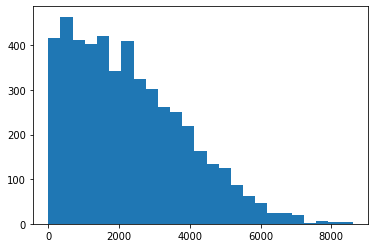

In [572]:
### YOUR CODE HERE
import matplotlib.pyplot as plt
plt.hist(transactions['price'], bins = 25)

**TASK 11:** Compute the mean quantity purchased broken down by user type:

In [576]:
simple_stats.groupby('Group').agg({'X' : [ np.mean, np.median, np.std ] })

### YOUR CODE HERE
transactions.groupby('user_type').agg({'quantity_purchased' : [np.mean]})

,quantity_purchased
,mean
user_type,
error,18.275862
existing,20.249169
loyal,21.014914
new,20.990913


**TASK 12:** Produce a [scatter plot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) of price (y) against quantity purchased (x):

In [577]:
### YOUR CODE HERE

**TASK 13:** Produce a [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) of price (y) broken down by user type (x):

In [578]:
### YOUR CODE HERE